In [1]:
#pip install auto-sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pprint import pprint

# **Ant Nuptial Flight Predictor**
---



In [3]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install --disable-pip-version-check --root-user-action=ignore python-arango sklite m2cgen pipelineprofiler xgboost

In [4]:
from math import log10, floor
def round_sig(x, sig=2):
    if x == 0: return x
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [5]:
from arango import ArangoClient
from datetime import datetime

# Initialize the ArangoDB client.
client = ArangoClient(hosts='http://arangodb:8529')

# Connect to "_system" database as root user.
# This returns an API wrapper for "_system" database.
# sys_db = client.db('_system', username='root', password='passwd')

# Connect to "nuptialFlight" database as root user.
# This returns an API wrapper for "nuptialFlight" database.
db = client.db('nuptialFlight', username='notebook', password='g54g54gwggsvd')

# Execute an AQL query. This returns a result cursor.
#FILTER DISTANCE(f.weather.lat, f.weather.lon, -35, 149) < 5000 * 1000
#FILTER f.size != 'small'
cursor = db.aql.execute(
    '''
FOR f IN flights
FILTER f.weather.lat <= -25 AND f.weather.lat > -180 AND f.weather.lon >= 90 AND f.weather.lon < 180
RETURN {
    f
}
    ''')

# Normalise all values to between 0 and 1
def normalise(low, high, value):
    return (max(low, min(high, value)) - low) / (high - low)


count = 0
#dataset = []
features = []
for row in cursor:
    if count == 0: print(row)
    count = count + 1
    #dataset.append(row['f'])
    features.append({
        #'_id': row['f']['_id'],
        'target': row['f']['flight'] == 'yes',
        #'target': row['f'].get('size', 'none'),
        'lat': round(row['f']['weather']['lat'], 0),
        'lon': round(row['f']['weather']['lon'], 0),
        'dayOfYear': datetime.utcfromtimestamp(row['f']['weather']['daily'][0]['dt']).timetuple().tm_yday, # returns 1 for January 1st,
        #'month': datetime.utcfromtimestamp(row['f']['weather']['daily'][0]['dt']).timetuple().tm_mon,
        #'season': datetime.utcfromtimestamp(row['f']['weather']['daily'][0]['dt']).timetuple().tm_mon % 12 // 3 + 1,
        'day': row['f']['weather']['daily'][0]['temp']['day'],
        #'eve': row['f']['weather']['daily'][0]['temp']['eve'],
        #'min': row['f']['weather']['daily'][0]['temp']['min'],
        #'max': row['f']['weather']['daily'][0]['temp']['max'],
        #'night': row['f']['weather']['daily'][0]['temp']['night'],
        #'morn': row['f']['weather']['daily'][0]['temp']['morn'],
        #'feelsLike': row['f']['weather']['daily'][0]['feels_like']['day'],
        'windSpeed': row['f']['weather']['daily'][0]['wind_speed'],
        #'windGust': row['f']['weather']['daily'][0]['wind_gust'],
        #'windDeg': row['f']['weather']['daily'][0]['wind_deg'],
        'rain': row['f']['weather']['daily'][0]['pop'],
        'humid': row['f']['weather']['daily'][0]['humidity'],
        'cloud': row['f']['weather']['daily'][0]['clouds'],
        'press': row['f']['weather']['daily'][0]['pressure'],
        #'dewPoint': row['f']['weather']['daily'][0]['dew_point'],
        #'description': row['f']['weather']['daily'][0]['weather'][0]['description'],
        #'uvi': row['f']['weather']['daily'][0]['uvi'],
        
        #'day1': row['f']['weather']['daily'][1]['temp']['day'],
        #'morn1': row['f']['weather']['daily'][1]['temp']['morn'],
        #'feelsLike1': row['f']['weather']['daily'][1]['feels_like']['day'],
        #'windSpeed1': row['f']['weather']['daily'][1]['wind_speed'],
        #'windGust1': row['f']['weather']['daily'][1]['wind_gust'],
        #'windDeg1': row['f']['weather']['daily'][1]['wind_deg'],
        #'humid1': row['f']['weather']['daily'][1]['humidity'],
        #'cloud1': row['f']['weather']['daily'][1]['clouds'],
        #'press1': row['f']['weather']['daily'][1]['pressure'],
        #'dewPoint1': row['f']['weather']['daily'][1]['dew_point'],
        #'uvi1': row['f']['weather']['daily'][1]['uvi'],

        #'day2': row['f']['weather']['daily'][2]['temp']['day'],
        #'morn2': row['f']['weather']['daily'][2]['temp']['morn'],
        #'feelsLike2': row['f']['weather']['daily'][2]['feels_like']['day'],
        #'windSpeed2': row['f']['weather']['daily'][2]['wind_speed'],
        #'windGust2': row['f']['weather']['daily'][2]['wind_gust'],
        #'windDeg2': row['f']['weather']['daily'][2]['wind_deg'],
        #'humid2': row['f']['weather']['daily'][2]['humidity'],
        #'cloud2': row['f']['weather']['daily'][2]['clouds'],
        #'press2': row['f']['weather']['daily'][2]['pressure'],
        #'dewPoint2': row['f']['weather']['daily'][2]['dew_point'],
        #'uvi2': row['f']['weather']['daily'][2]['uvi'],

        #'day': normalise(10, 30, row['f']['weather']['daily'][0]['temp']['day']),
        #'eve': normalise(10, 30, row['f']['weather']['daily'][0]['temp']['eve']),
        #'min': normalise(5, 25, row['f']['weather']['daily'][0]['temp']['min']),
        #'max': normalise(15, 35, row['f']['weather']['daily'][0]['temp']['max']),
        #'night': normalise(5, 25, row['f']['weather']['daily'][0]['temp']['night']),
        #'morn': normalise(5, 25, row['f']['weather']['daily'][0]['temp']['morn']),
        #'feelsLike': normalise(10, 40, row['f']['weather']['daily'][0]['feels_like']['day']),
        #'windSpeed': normalise(0, 15, row['f']['weather']['daily'][0]['wind_speed']),
        #'windGust': normalise(0, 15, row['f']['weather']['daily'][0]['wind_gust']),
        #'rain': normalise(0, 1, row['f']['weather']['daily'][0]['pop']),
        #'humid': normalise(0, 100, row['f']['weather']['daily'][0]['humidity']),
        #'cloud': normalise(0, 100, row['f']['weather']['daily'][0]['clouds']),
        #'press': normalise(995, 1030, row['f']['weather']['daily'][0]['pressure']),
        #'dewPoint': normalise(-5, 25, row['f']['weather']['daily'][0]['dew_point']),
        #'description': row['f']['weather']['daily'][0]['weather'][0]['description'],
        #'uvi': normalise(0, 14, row['f']['weather']['daily'][0]['uvi']),
    })

print(len(features))
print(features[0])
#print(dataset[0])

{'f': {'_key': '8181965', '_id': 'flights/8181965', '_rev': '_e5XJLfC---', 'flight': 'yes', 'weather': {'daily': [{'dt': 1665190800, 'sunrise': 1665171041, 'sunset': 1665216671, 'moonrise': 1665210360, 'moonset': 1665168240, 'moon_phase': 0.43, 'temp': {'day': 16.37, 'min': 8.35, 'max': 16.37, 'night': 8.35, 'eve': 13.05, 'morn': 10.38}, 'feels_like': {'day': 16.07, 'night': 6.84, 'eve': 12.79, 'morn': 10.06}, 'pressure': 1014, 'humidity': 77, 'dew_point': 11.95, 'wind_speed': 5.64, 'wind_deg': 319, 'wind_gust': 7.2, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'clouds': 73, 'pop': 1, 'rain': 19.78, 'uvi': 6.05}, {'dt': 1665277200, 'sunrise': 1665257358, 'sunset': 1665303120, 'moonrise': 1665300720, 'moonset': 1665256320, 'moon_phase': 0.47, 'temp': {'day': 9.89, 'min': 3.89, 'max': 11.33, 'night': 4.66, 'eve': 10.12, 'morn': 4.15}, 'feels_like': {'day': 9.89, 'night': 4.66, 'eve': 9.46, 'morn': 2.73}, 'pressure': 1021, 'humidity': 66, 'dew_p

In [10]:
from sklearn import preprocessing

df = pd.DataFrame(data=features)

df['northern'] = [lat > 0 for lat in df['lat']]
df['daysSinceSpring'] = [((dayOfYear - (31 + 28 + 31 + 30 + 31 + 30 + 31 + 31)) % 365) for dayOfYear in df['dayOfYear']]
df.loc[df['northern'] == True, 'daysSinceSpring'] = (df['daysSinceSpring'] - (31 + 30 + 31 + 30 + 31 + 31)) % 365

df = df.drop(['dayOfYear', 'northern'], axis=1)

# split into input and output elements
#data = df.values
#X, y = data[:, :-1], data[:, -1]
#print(X.shape, y.shape)
print(df['target'].value_counts())

df

False    10594
True       384
Name: target, dtype: int64


,target,lat,lon,day,windSpeed,rain,humid,cloud,press,daysSinceSpring
0,True,-35.0,149.0,16.37,5.64,1.00,77,73,1014,38
1,True,-35.0,149.0,16.37,5.64,1.00,77,73,1014,38
2,False,-35.0,149.0,16.87,5.33,1.00,71,79,1014,38
3,False,-35.0,149.0,16.51,5.62,1.00,76,75,1014,38
4,True,-35.0,149.0,16.37,5.64,1.00,77,73,1014,38
...,...,...,...,...,...,...,...,...,...,...
10973,False,-35.0,139.0,27.02,5.77,0.83,61,13,1007,129
10974,False,-33.0,117.0,29.56,6.88,0.00,30,100,1013,129
10975,False,-33.0,117.0,29.76,6.89,0.00,30,100,1013,129
10976,False,-28.0,152.0,27.45,4.80,0.22,50,100,1018,129


In [11]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

TEMP_AVG = 16.5; # 24.00;
TEMP_STD = 10; # 3.96;
HUMIDITY_AVG = 77.00; # 62.00;
HUMIDITY_STD = 30; # 7.99;
WIND_AVG = 5.7; # 3.96;
WIND_STD = 5; # 0.78;
RAIN_AVG = 0;
RAIN_STD = 0;
CLOUD_AVG = 70;
CLOUD_STD = 30;
PRESSURE_AVG = 1014; # 1020;
PRESSURE_STD = 14.85;
RADIATION_AVG = 225.7; # (J.cm-2.h-1)
RADIATION_STD = 19.5; # SE not SD
UVI_AVG = 6.1;
UVI_STD = 6;

def true_temp(temp):
    return max(0, min(0.5, norm.cdf(-abs(temp - TEMP_AVG) / TEMP_STD))) * 2

def true_humidity(humidity):
    return max(0, min(0.5, norm.cdf(-abs(humidity - HUMIDITY_AVG) / HUMIDITY_STD))) * 2

def true_wind(windSpeed):
    return max(0, min(0.5, norm.cdf(-abs(windSpeed - WIND_AVG) / WIND_STD))) * 2

def true_rain(pop):
    return 1.0 - pop

def true_cloud(cloud):
    return max(0, min(0.5, norm.cdf(-abs(cloud - CLOUD_AVG) / CLOUD_STD))) * 2

def true_pressure(pressure):
    return max(0, min(0.5, norm.cdf(-abs(pressure - PRESSURE_AVG) / PRESSURE_STD))) * 2

def true_uvi(uvi):
    return max(0, min(0.5, norm.cdf(-abs(uvi - UVI_AVG) / UVI_STD))) * 2

def true_dewPoint(dewPoint):
    return max(0, min(0.5, norm.cdf(-abs(dewPoint - TEMP_AVG) / TEMP_STD))) * 2

def true_funct(val):
    return 1

def map_true_fun(X, function):
    return list(map(function, X))

In [12]:
#df = df.assign(deltaDay = lambda x: true_temp(x.day))
#df = df.assign(deltaWind = lambda x: true_wind(x.windSpeed))
#df = df.assign(deltaHumid = lambda x: true_humidity(x.humid))
#df = df.assign(deltaCloud = lambda x: true_cloud(x.cloud))
#df = df.assign(deltaPress = lambda x: true_pressure(x.press))

for i in range(len(df)):
    df.loc[i, "day"]   = round_sig((df.iloc[i]["day"]), 2)
    #df.loc[i, "morn"] = round_sig((df.iloc[i]["morn"]), 2)
    #df.loc[i, "max"]  = round_sig((df.iloc[i]["max"]), 2)
    df.loc[i, "windSpeed"]  = round_sig((df.iloc[i]["windSpeed"]), 2)
    #df.loc[i, "windGust"] = round_sig((df.iloc[i]["windGust"]), 2)
    #df.loc[i, "windDeg"]  = round_sig((df.iloc[i]["windDeg"]), 2)
    df.loc[i, "rain"] = round_sig((df.iloc[i]["rain"]), 2)
    df.loc[i, "humid"] = round_sig((df.iloc[i]["humid"]), 2)
    df.loc[i, "cloud"] = round_sig((df.iloc[i]["cloud"]), 2)
    df.loc[i, "press"] = round_sig((df.iloc[i]["press"]), 4)
    #df.loc[i, "dewPoint"] = round_sig((df.iloc[i]["dewPoint"]), 2)
    #df.loc[i, "max1"]  = round_sig((df.iloc[i]["max1"]), 2)
    #df.loc[i, "windSpeed1"]  = round_sig((df.iloc[i]["windSpeed1"]), 2)
    #df.loc[i, "humid1"] = round_sig((df.iloc[i]["humid1"]), 2)
    #df.loc[i, "cloud1"] = round_sig((df.iloc[i]["cloud1"]), 2)
    #df.loc[i, "press1"] = round_sig((df.iloc[i]["press1"]), 4)
    #df.loc[i, "dewPoint1"] = round_sig((df.iloc[i]["dewPoint1"]), 2)

print(df['target'].value_counts())
df

False    10594
True       384
Name: target, dtype: int64


,target,lat,lon,day,windSpeed,rain,humid,cloud,press,daysSinceSpring
0,True,-35.0,149.0,16.0,5.6,1.00,77,73,1014,38
1,True,-35.0,149.0,16.0,5.6,1.00,77,73,1014,38
2,False,-35.0,149.0,17.0,5.3,1.00,71,79,1014,38
3,False,-35.0,149.0,17.0,5.6,1.00,76,75,1014,38
4,True,-35.0,149.0,16.0,5.6,1.00,77,73,1014,38
...,...,...,...,...,...,...,...,...,...,...
10973,False,-35.0,139.0,27.0,5.8,0.83,61,13,1007,129
10974,False,-33.0,117.0,30.0,6.9,0.00,30,100,1013,129
10975,False,-33.0,117.0,30.0,6.9,0.00,30,100,1013,129
10976,False,-28.0,152.0,27.0,4.8,0.22,50,100,1018,129


In [13]:
# force the column's string column B to type 'category'  
df['target'] = df['target'].astype('category')
# define the valid categories: 
df['target'] = df['target'].cat.set_categories([True, False], ordered=True) 
#pandas dataframe sort_values to inflicts order on your categories 
df.sort_values(['target'], inplace=True, ascending=True) 


In [14]:
#check null values in the dataset
df.isnull().sum()

target             0
lat                0
lon                0
day                0
windSpeed          0
rain               0
humid              0
cloud              0
press              0
daysSinceSpring    0
dtype: int64

In [15]:
from sklearn.utils import resample
healthy   = df[df["target"] != False]
unhealthy = df[df["target"] == False]

In [16]:
healthy

,target,lat,lon,day,windSpeed,rain,humid,cloud,press,daysSinceSpring
0,True,-35.0,149.0,16.0,5.6,1.00,77,73,1014,38
6610,True,-35.0,139.0,25.0,3.6,0.00,31,88,1024,237
6612,True,-38.0,145.0,20.0,4.6,0.00,63,91,1027,237
6613,True,-35.0,149.0,20.0,2.0,0.00,49,0,1027,237
9845,True,-34.0,151.0,35.0,5.4,0.20,27,10,1012,73
...,...,...,...,...,...,...,...,...,...,...
292,True,-35.0,149.0,16.0,3.1,0.28,55,2,1025,65
5380,True,-35.0,139.0,23.0,4.4,0.00,40,2,1015,191
48,True,-34.0,151.0,22.0,3.3,0.41,67,100,1014,49
5515,True,-37.0,175.0,20.0,4.4,0.30,42,0,1020,195


In [17]:
unhealthy

,target,lat,lon,day,windSpeed,rain,humid,cloud,press,daysSinceSpring
5663,False,-34.0,151.0,38.0,4.7,0.20,16,6,1016,200
7416,False,-25.0,153.0,22.0,3.9,0.46,67,23,1020,281
7403,False,-34.0,151.0,18.0,6.1,0.00,66,10,1025,280
7417,False,-25.0,153.0,22.0,3.8,0.47,67,21,1020,281
7408,False,-34.0,151.0,18.0,5.5,0.00,62,6,1026,280
...,...,...,...,...,...,...,...,...,...,...
3729,False,-33.0,152.0,26.0,4.2,0.91,62,97,1003,153
3730,False,-38.0,145.0,23.0,5.3,0.00,43,8,1007,153
3731,False,-28.0,153.0,29.0,4.2,1.00,65,83,1003,153
3723,False,-36.0,145.0,30.0,6.4,0.00,16,0,1003,153


In a Machine Learning problem, make sure to upsample/downsample ONLY AFTER you split into train, test (and validate if you wish). If you do upsample your dataset before you split into train and test, there is a high possibility that your model is exposed to data leakage. See an Example below.
https://towardsdatascience.com/heres-what-i-ve-learnt-about-sklearn-resample-ab735ae1abc4

In [18]:
up_sampled = resample(unhealthy, replace=False, n_samples=int(len(healthy)*1))
up_sampled = pd.concat([healthy, up_sampled])

In [19]:
#check updated class counts
up_sampled['target'].value_counts()

True     384
False    384
Name: target, dtype: int64

In [20]:
#X1 = up_sampled.drop(['target','day','windSpeed','humid','cloud','press',], axis=1)
X1 = up_sampled.drop(['target'], axis=1)
y1 = up_sampled['target']
X1.shape, y1.shape

((768, 9), (768,))

In [23]:
corr_matrix = X1.corr()
#print(corr_matrix['day'].sort_values(ascending=False))
#print(corr_matrix['morn'].sort_values(ascending=False))
print()
print(corr_matrix['windSpeed'].sort_values(ascending=False))
#print(corr_matrix['windGust'].sort_values(ascending=False))
print()
print(corr_matrix['humid'].sort_values(ascending=False))
print()
#print(corr_matrix['cloud'].sort_values(ascending=False))
#print()
print(corr_matrix['press'].sort_values(ascending=False))
print()
#print(corr_matrix['dewPoint'].sort_values(ascending=False))
corr_matrix


windSpeed          1.000000
day                0.200207
lat                0.030322
rain              -0.004907
cloud             -0.058831
daysSinceSpring   -0.088673
humid             -0.120877
press             -0.328310
lon               -0.396105
Name: windSpeed, dtype: float64

humid              1.000000
rain               0.546124
cloud              0.459848
daysSinceSpring    0.192811
lon                0.101054
press             -0.003773
lat               -0.034328
windSpeed         -0.120877
day               -0.566790
Name: humid, dtype: float64

press              1.000000
daysSinceSpring    0.197324
lat                0.052858
humid             -0.003773
lon               -0.046703
cloud             -0.093952
rain              -0.309914
day               -0.313319
windSpeed         -0.328310
Name: press, dtype: float64



,lat,lon,day,windSpeed,rain,humid,cloud,press,daysSinceSpring
lat,1.000000,-0.008415,0.331177,0.030322,-0.014633,-0.034328,-0.001970,0.052858,0.062786
lon,-0.008415,1.000000,-0.039679,-0.396105,0.209724,0.101054,0.208721,-0.046703,-0.181650
day,0.331177,-0.039679,1.000000,0.200207,-0.197068,-0.566790,-0.182372,-0.313319,-0.272684
windSpeed,0.030322,-0.396105,0.200207,1.000000,-0.004907,-0.120877,-0.058831,-0.328310,-0.088673
rain,-0.014633,0.209724,-0.197068,-0.004907,1.000000,0.546124,0.549238,-0.309914,-0.041286
humid,-0.034328,0.101054,-0.566790,-0.120877,0.546124,1.000000,0.459848,-0.003773,0.192811
cloud,-0.001970,0.208721,-0.182372,-0.058831,0.549238,0.459848,1.000000,-0.093952,-0.040086
press,0.052858,-0.046703,-0.313319,-0.328310,-0.309914,-0.003773,-0.093952,1.000000,0.197324
daysSinceSpring,0.062786,-0.181650,-0.272684,-0.088673,-0.041286,0.192811,-0.040086,0.197324,1.000000


In [24]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((614, 9), (154, 9), (614,), (154,))

In [25]:
from numpy import mean
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define the model
#automl = RandomForestClassifier(max_features=4, min_samples_split=3, n_estimators=6, n_jobs=-1, ccp_alpha=0.0008)
automl = RandomForestClassifier(n_jobs=-1)

# fit the model on the whole dataset
automl.fit(X1_train, y1_train)

# calibrate
calibrated = CalibratedClassifierCV(base_estimator=automl, n_jobs=-1, ensemble=False, cv=10)
calibrated.fit(X1_train, y1_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_jobs=-1), cv=10,
                       ensemble=False, n_jobs=-1)

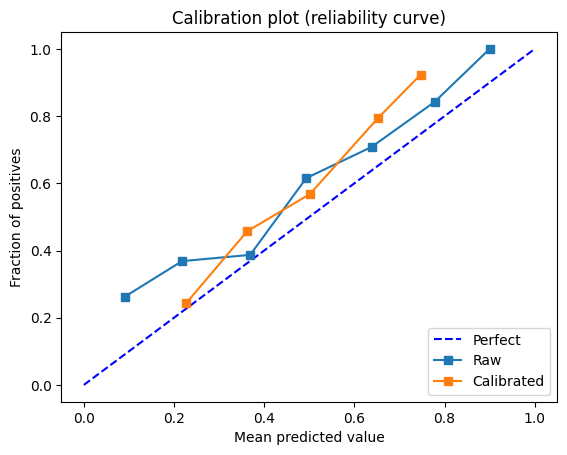

In [26]:
from sklearn.calibration import calibration_curve
from matplotlib import pyplot

fig = plt.figure()
ax = fig.add_subplot()
ax.plot([0, 1], [0, 1], "b--", label="Perfect")
ax.set_ylabel("Fraction of positives")
ax.set_xlabel("Mean predicted value")
ax.set_title('Calibration plot (reliability curve)')

prob_pos_rfc = automl.predict_proba(X1_test)[:, 1]
fraction_of_positives_rfc, mean_predicted_value_rfc = calibration_curve(y1_test, prob_pos_rfc, n_bins=7)
ax.plot(mean_predicted_value_rfc, fraction_of_positives_rfc, "s-", label="%s" % ('Raw'))

prob_pos_lr = calibrated.predict_proba(X1_test)[:, 1]
fraction_of_positives_lr, mean_predicted_value_lr = calibration_curve(y1_test, prob_pos_lr, n_bins=7)
ax.plot(mean_predicted_value_lr, fraction_of_positives_lr, "s-", label="%s" % ('Calibrated'))

ax.legend(loc="lower right")
plt.show()

In [27]:
#automl.refit(X1_train.copy(), y1_train.copy())

In [28]:
#print(automl.sprint_statistics())

In [29]:
#automl.leaderboard()

In [30]:
#automl.leaderboard(detailed = True, ensemble_only=False)

In [31]:
#automl.show_models()

In [32]:
#automl.get_models_with_weights()

In [33]:
automl.score(X1_train, y1_train)

0.993485342019544

In [34]:
automl.score(X1_test, y1_test)

0.6623376623376623

True Positive(TP)  =  48
False Positive(FP) =  36
True Negative(TN)  =  54
False Negative(FN) =  16


<AxesSubplot: >

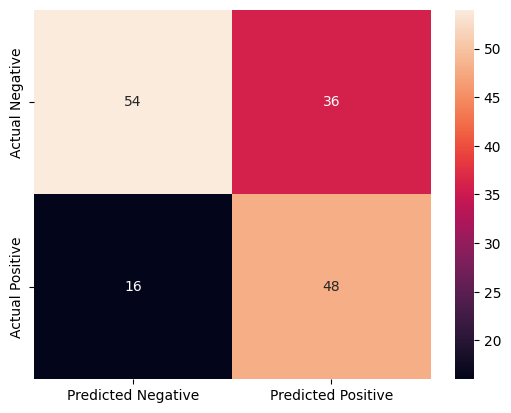

In [35]:
# Score of the final ensemble
from sklearn.metrics import confusion_matrix, accuracy_score
y1_pred = automl.predict(X1_test)
conf_matrix = confusion_matrix(y1_pred, y1_test)

TN, FP, FN, TP = conf_matrix.ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

sns.heatmap(conf_matrix, annot=True, xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

pred = automl.predict(X1_test)
m2_acc_score = accuracy_score(y1_test, y1_pred)
print("Test Accuracy score  {0}".format(m2_acc_score))
m2_test_f1 = f1_score(y1_test, y1_pred)
print(f"Test F1-Score        {m2_test_f1}")

Test Accuracy score  0.6623376623376623
Test F1-Score        0.6486486486486486


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

       False       0.60      0.77      0.68        70
        True       0.75      0.57      0.65        84

    accuracy                           0.66       154
   macro avg       0.68      0.67      0.66       154
weighted avg       0.68      0.66      0.66       154



In [38]:
import pickle
# save the model 
filename = 'final_model10.sav' 
pickle.dump(automl, open(filename, 'wb'))

In [39]:
#load the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X1_test, y1_test)
print(result)

0.6623376623376623


In [40]:
import os
import joblib
# save the model 
joblib.dump(automl, filename)
print(f"Random Forest size: {np.round(os.path.getsize(filename) / 1024 / 1024, 2) } MB")

Random Forest size: 1.83 MB


In [41]:
# define one new data instance
#Xsample = {'day': 0.30, 'eve': 0.15, 'min': 0.16, 'max': 0.07, 'night': 0.18, 'morn': 0.27, 'feelsLike': 0.20, 'windSpeed': 0.38, 'windGust': 0.48, 'rain': 0.99, 'humid': 0.76, 'cloud': 0.99, 'press': 0.54, 'dewPoint': 0.57, 'uvi': 0.43}
#Xsample = {'lat': -35.1968, 'day': 16.37, 'eve': 13.05, 'min': 8.35, 'max': 16.37, 'night': 8.35, 'morn': 10.38, 'feelsLike': 16.07, 'windSpeed': 5.64, 'windGust': 7.2, 'rain': 1, 'humid': 77, 'cloud': 73, 'press': 1014, 'dewPoint': 11.95, 'uvi': 6.05}
#Xsample = {'lat': -35.0, 'day': 22, 'eve': 18, 'min': 13, 'max': 23, 'night': 16, 'morn': 17, 'feelsLike': 23, 'windSpeed': 4, 'windGust': 4, 'rain': 0, 'humid': 70, 'cloud': 0, 'press': 1010, 'dewPoint': 18.43, 'uvi': 6}
Xsample = {'lat': -35.2, 'lon': 149.1, 'dayOfYear': 281, 'month': 10, 'season': 4, 'northern': False, 'daysSinceSpring': 38, 'day': 16.4, 'eve': 13.1, 'min': 8.3, 'max': 16.4, 'night': 8.4, 'morn': 10.5, 'feelsLike': 16.1, 'windSpeed': 5.7, 'windGust': 7.1, 'rain': 0.95, 'humid': 77, 'cloud': 74, 'press': 1013, 'dewPoint': 12.0, 'uvi': 6.1}
#Xsample = {'lat': -28.0, 'lon': 153.0, 'northern': False, 'daysSinceSpring': 140, 'day': 27.0, 'windSpeed': 5.7, 'windGust': 7.1, 'rain': 0.95, 'humid': 77, 'cloud': 74, 'press': 1013, 'dewPoint': 12.0, 'uvi': 6.1}
#print(Xsample)

#Xsample["deltaDay"] = true_temp(Xsample["day"])
#Xsample["deltaWind"] = true_wind(Xsample["windSpeed"])
#Xsample["deltaHumid"] = true_humidity(Xsample["humid"])
#Xsample["deltaCloud"] = true_cloud(Xsample["cloud"])
#Xsample["deltaPress"] = true_pressure(Xsample["press"])


Xtest = [Xsample]
Xnew = pd.DataFrame(data=Xtest, columns=X1_train.columns)
#print(Xnew)

# make a prediction
print(automl.predict(Xnew)[0])

# make a prediction
print(automl.predict_proba(Xnew)[0][1])
print(calibrated.predict_proba(Xnew)[0][1])

# get decision path
#print(automl.decision_path(Xnew))

# show the inputs and predicted outputs
Xnew

True
0.96
0.8089770872990305


,lat,lon,day,windSpeed,rain,humid,cloud,press,daysSinceSpring
0,-35.2,149.1,16.4,5.7,0.95,77,74,1013,38


In [42]:
def chart_parameter(title, parameter, true_fun, pMin, pMax):   
    Xtest = []
    for i in np.linspace(pMin, pMax, 100):
        XsampleCopy = Xsample.copy()
        XsampleCopy[parameter] = i
        #XsampleCopy["deltaDay"] = true_temp(XsampleCopy["day"])
        #XsampleCopy["deltaWind"] = true_wind(XsampleCopy["windSpeed"])
        #XsampleCopy["deltaHumid"] = true_humidity(XsampleCopy["humid"])
        #XsampleCopy["deltaCloud"] = true_cloud(XsampleCopy["cloud"])
        #XsampleCopy["deltaPress"] = true_pressure(XsampleCopy["press"])
        Xtest.append(XsampleCopy)

    Xnew = pd.DataFrame(data=Xtest, columns=X1_train.columns)
    #print(Xnew)

    n_samples = 0
    degrees = [1]

    #X = np.sort(np.random.rand(n_samples))
    #y = true_fun(X) + np.random.randn(n_samples) * 0.1
    #y = map_true_fun(X, true_fun)

    plt.figure(figsize=(14, 4))
    for i in range(len(degrees)):
        ax = plt.subplot(1, len(degrees), i + 1)
        #plt.setp(ax, xticks=())

        X_test = np.linspace(pMin, pMax, 100)
        #prediction = automl.predict_proba(Xnew)
        prediction = [item[1] for item in automl.predict_proba(Xnew)]
        plt.plot(X_test, prediction, label="Model")
        plt.plot(X_test, map_true_fun(X_test, true_fun), label="App")
        #plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
        plt.xlabel("Parameter")
        plt.ylabel("Confidence")
        plt.xlim((pMin, pMax))
        plt.ylim((-0.05, 1.05))
        plt.legend(loc="best")
        plt.title(title)
    plt.show()
    prediction

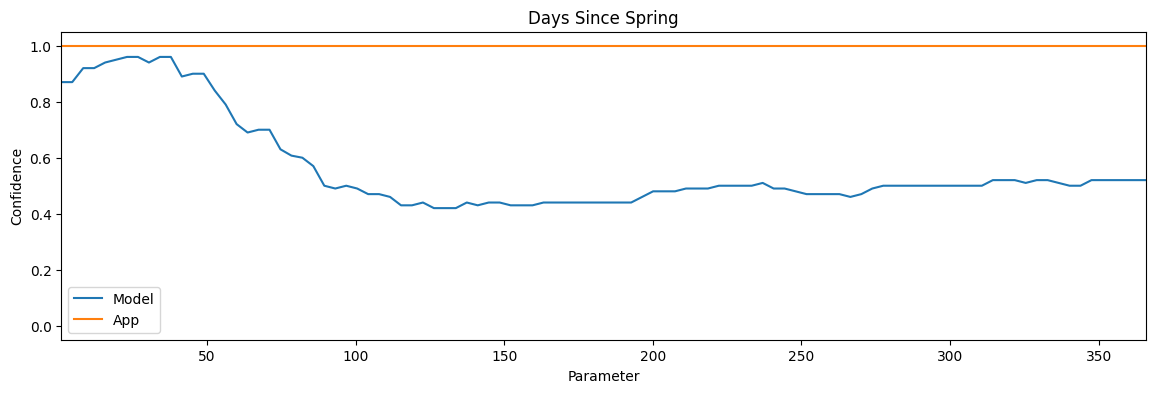

In [43]:
chart_parameter('Days Since Spring', 'daysSinceSpring', true_funct, 1, 366)

In [44]:
#chart_parameter('Morning Temp', 'morn', true_temp, 0, 40)

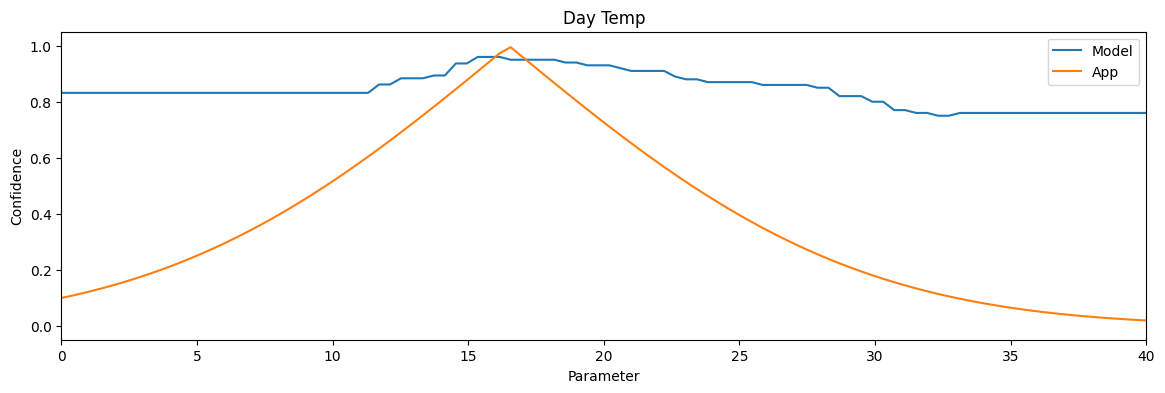

In [45]:
chart_parameter('Day Temp', 'day', true_temp, 0, 40)

In [46]:
#chart_parameter('Eve Temp', 'eve', true_temp, 0, 40)

In [47]:
#chart_parameter('Min Temp', 'min', true_temp, 0, 40)

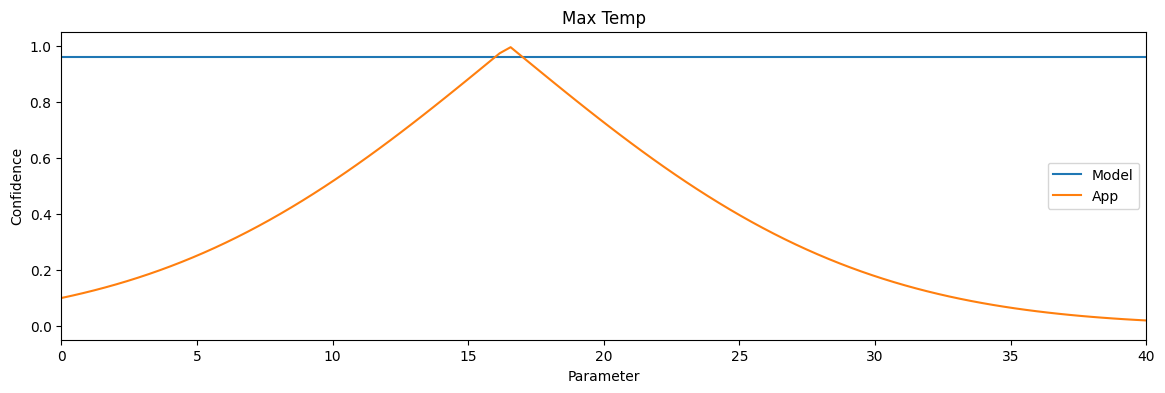

In [48]:
chart_parameter('Max Temp', 'max', true_temp, 0, 40)

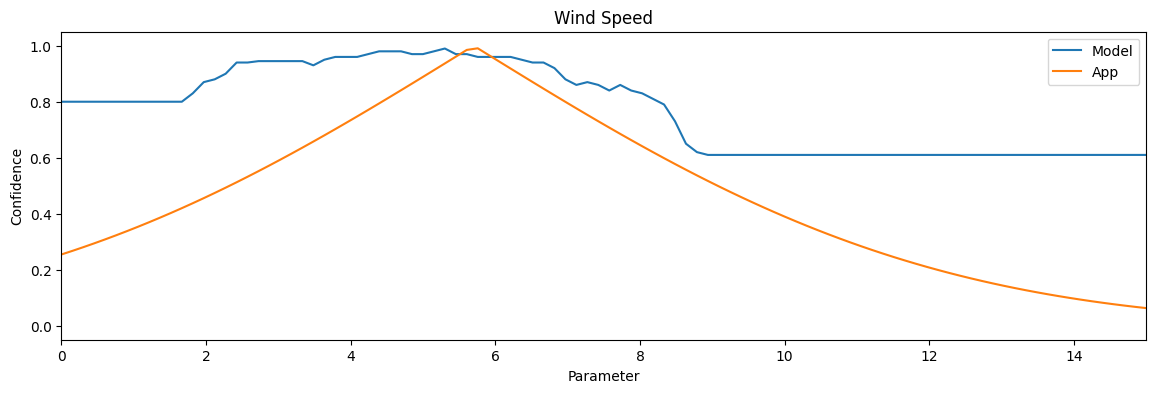

In [49]:
chart_parameter('Wind Speed', 'windSpeed', true_wind, 0, 15)

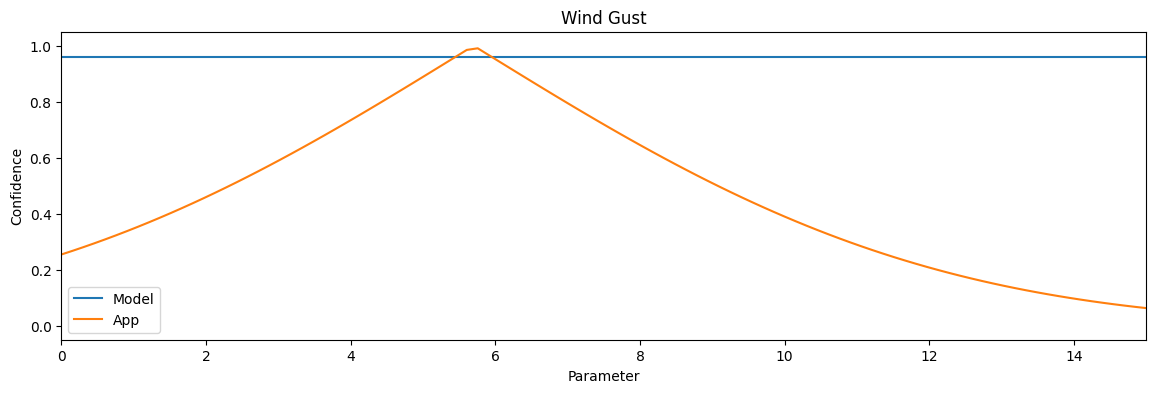

In [50]:
chart_parameter('Wind Gust', 'windGust', true_wind, 0, 15)

In [51]:
#chart_parameter('Wind Degree', 'windDeg', true_wind, 0, 15)

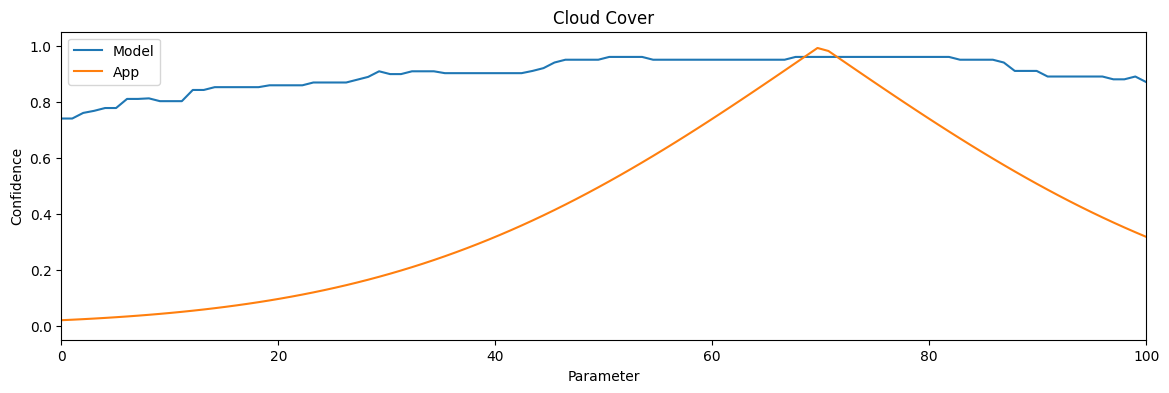

In [52]:
chart_parameter('Cloud Cover', 'cloud', true_cloud, 0, 100)

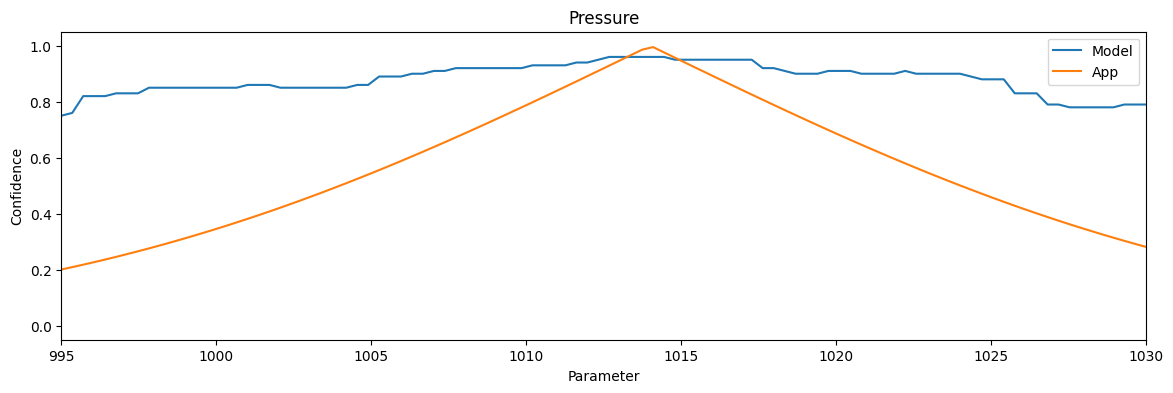

In [53]:
chart_parameter('Pressure', 'press', true_pressure, 995, 1030)

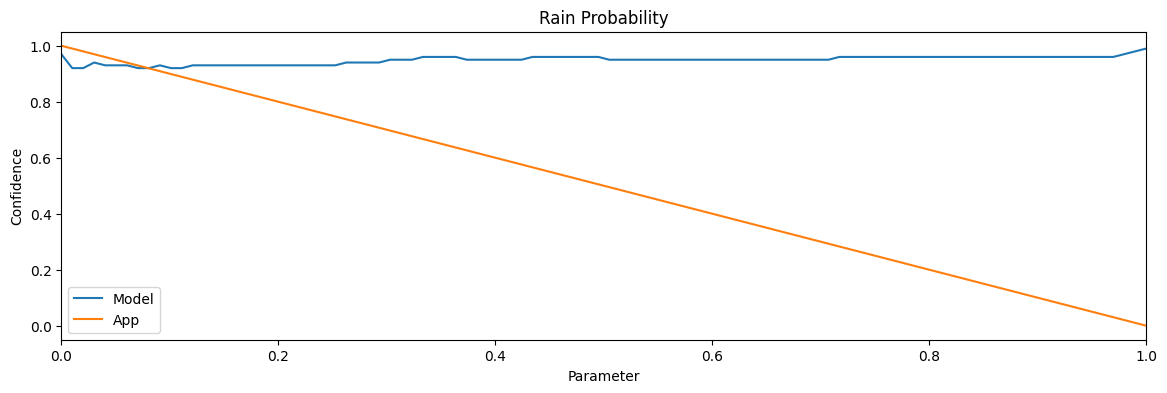

In [54]:
chart_parameter('Rain Probability', 'rain', true_rain, 0, 1)

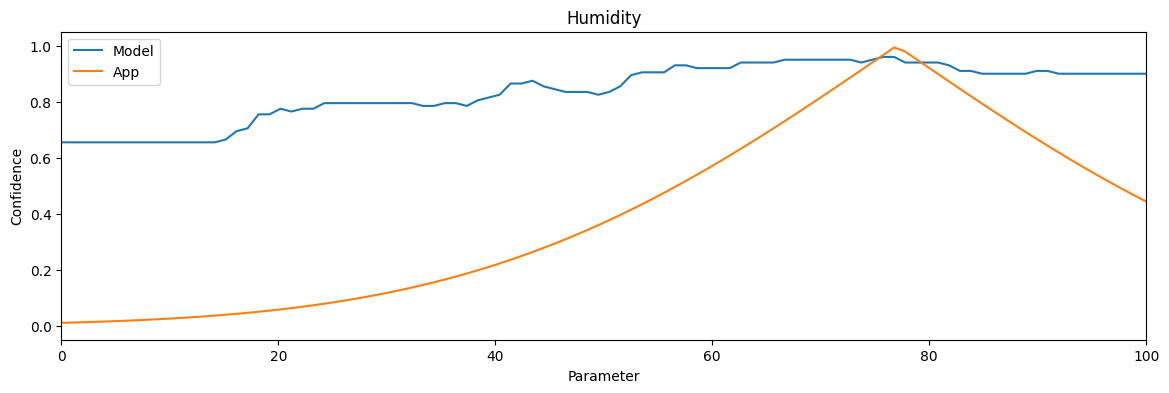

In [55]:
chart_parameter('Humidity', 'humid', true_humidity, 0, 100)

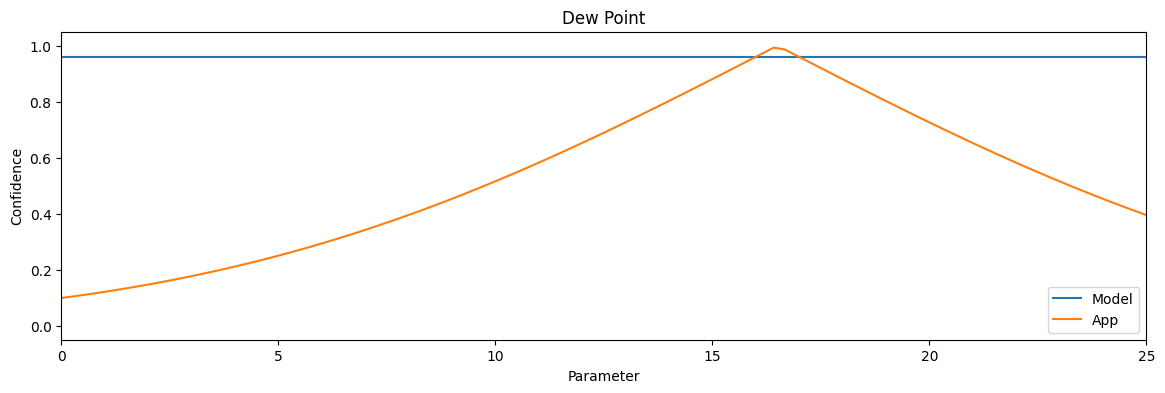

In [56]:
chart_parameter('Dew Point', 'dewPoint', true_dewPoint, 0, 25)

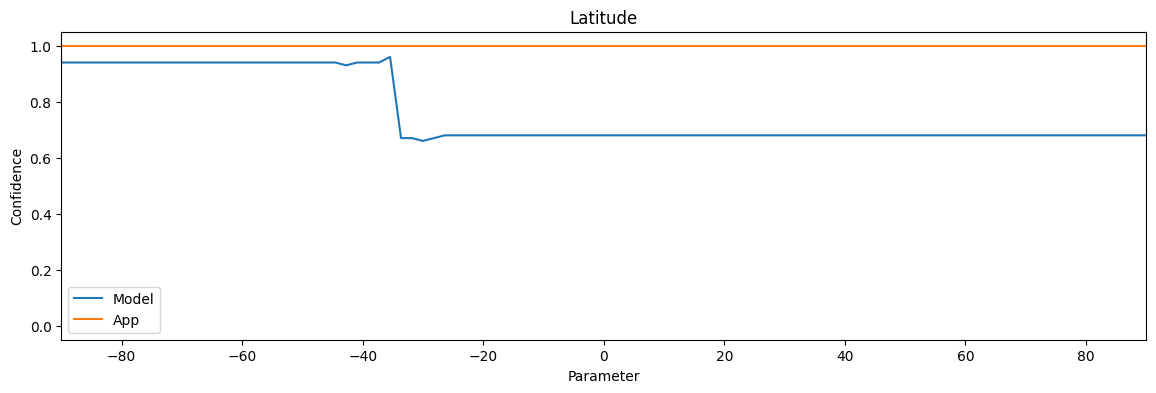

In [57]:
chart_parameter('Latitude', 'lat', true_funct, -90, 90)

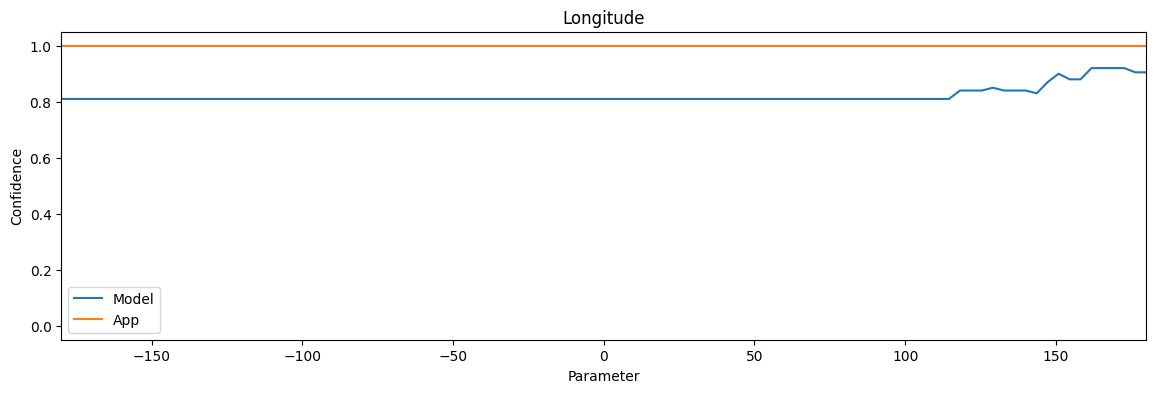

In [58]:
chart_parameter('Longitude', 'lon', true_funct, -180, 180)

In [59]:
from sklearn import linear_model, tree
import m2cgen as m2c
import pickle

code = m2c.export_to_dart(automl)

# save the model 
filename = 'final_model10.dart' 
text_file = open(filename, "w")
n = text_file.write(code)
text_file.close()
print(f"Random Forest size: {np.round(os.path.getsize(filename) / 1024 / 1024, 2) } MB")

Random Forest size: 2.54 MB


In [60]:
from sklite import LazyExport
lazy = LazyExport(automl)
lazy.save('final_model10.json', force_override=True)